# Import liabraries



In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np


from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Load Data

In [29]:
frankfurt=pd.read_csv('tomslee_airbnb_aarhus_1353_2017-06-19.csv')

In [30]:
frankfurt.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
0,6810720,1353,22377173,Entire home/apt,NaN,Aarhus,NaN,1,4,5.0,6,3.0,NaN,167.0,NaN,Charmerende nyrenoveret villa,2017-06-19 08:52:30.368149,56.121292,10.194918,0101000020E6100000AFCDC64ACC6324401AA20A7F860F...
1,1165756,1353,6384828,Entire home/apt,NaN,Aarhus,NaN,24,4,5.0,3,2.0,NaN,156.0,NaN,"Udsigt til skov, hav og midtby!",2017-06-19 08:52:30.365764,56.139545,10.207896,0101000020E61000003DF03158716A244000A94D9CDC11...
2,18621562,1353,62141114,Entire home/apt,NaN,Aarhus,NaN,6,1,0.0,4,1.0,NaN,153.0,NaN,Amazing apartment in Aarhus C,2017-06-19 08:52:30.344763,56.156649,10.179333,0101000020E6100000E82FF488D15B2440BEF90D130D14...
3,19024400,1353,31996095,Entire home/apt,NaN,Aarhus,NaN,24,1,0.0,4,0.0,NaN,156.0,NaN,Lejlighed i gåafstand til Northside til 4 pers...,2017-06-19 08:52:30.332652,56.144958,10.192338,0101000020E61000005C8E57207A62244094A5D6FB8D12...
4,11914661,1353,31508144,Entire home/apt,NaN,Aarhus,NaN,2,1,0.0,7,4.0,NaN,156.0,NaN,Stor villa 3 km fra Århus centrum,2017-06-19 08:52:30.329923,56.136666,10.170413,0101000020E610000062A06B5F40572440D13C80457E11...


# Data Preparation

In [31]:
frankfurt.describe()

,room_id,survey_id,host_id,country,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude
count,2.802000e+03,2802.0,2.802000e+03,0.0,0.0,2802.000000,2802.000000,2802.000000,2802.000000,2802.000000,0.0,2802.000000,0.0,2802.000000,2802.000000
mean,1.227302e+07,1353.0,4.718615e+07,NaN,NaN,17.341185,6.104211,2.124554,3.296217,1.473947,NaN,79.537473,NaN,56.159345,10.196981
std,5.361463e+06,0.0,3.643653e+07,NaN,NaN,9.456260,11.635785,2.373168,1.621233,0.875425,NaN,50.101919,NaN,0.017186,0.021284
min,6.010800e+04,1353.0,2.365970e+05,NaN,NaN,1.000000,0.000000,0.000000,1.000000,0.000000,NaN,10.000000,NaN,56.106833,10.103322
25%,7.407532e+06,1353.0,1.739020e+07,NaN,NaN,5.000000,0.000000,0.000000,2.000000,1.000000,NaN,46.000000,NaN,56.148379,10.190459
50%,1.335782e+07,1353.0,3.685777e+07,NaN,NaN,24.000000,2.000000,0.000000,3.000000,1.000000,NaN,70.000000,NaN,56.158409,10.200022
75%,1.721692e+07,1353.0,6.989847e+07,NaN,NaN,24.000000,7.000000,5.000000,4.000000,2.000000,NaN,93.000000,NaN,56.166258,10.208400
max,1.936697e+07,1353.0,1.356871e+08,NaN,NaN,24.000000,138.000000,5.000000,16.000000,6.000000,NaN,773.000000,NaN,56.247374,10.266945


In [32]:
frankfurt = frankfurt.drop(['country','bathrooms','borough','minstay','last_modified','name'], axis=1)

In [33]:
frankfurt = frankfurt.drop(['room_id','host_id'], axis=1)
frankfurt.head()

,survey_id,room_type,city,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude,location
0,1353,Entire home/apt,Aarhus,1,4,5.0,6,3.0,167.0,56.121292,10.194918,0101000020E6100000AFCDC64ACC6324401AA20A7F860F...
1,1353,Entire home/apt,Aarhus,24,4,5.0,3,2.0,156.0,56.139545,10.207896,0101000020E61000003DF03158716A244000A94D9CDC11...
2,1353,Entire home/apt,Aarhus,6,1,0.0,4,1.0,153.0,56.156649,10.179333,0101000020E6100000E82FF488D15B2440BEF90D130D14...
3,1353,Entire home/apt,Aarhus,24,1,0.0,4,0.0,156.0,56.144958,10.192338,0101000020E61000005C8E57207A62244094A5D6FB8D12...
4,1353,Entire home/apt,Aarhus,2,1,0.0,7,4.0,156.0,56.136666,10.170413,0101000020E610000062A06B5F40572440D13C80457E11...


In [34]:
#cheaking is there any null values or not.
#if there is no null value, then our dataset is ready to go.
frankfurt.isnull().sum()

survey_id               0
room_type               0
city                    0
neighborhood            0
reviews                 0
overall_satisfaction    0
accommodates            0
bedrooms                0
price                   0
latitude                0
longitude               0
location                0
dtype: int64

# Exploratory Data Analysis

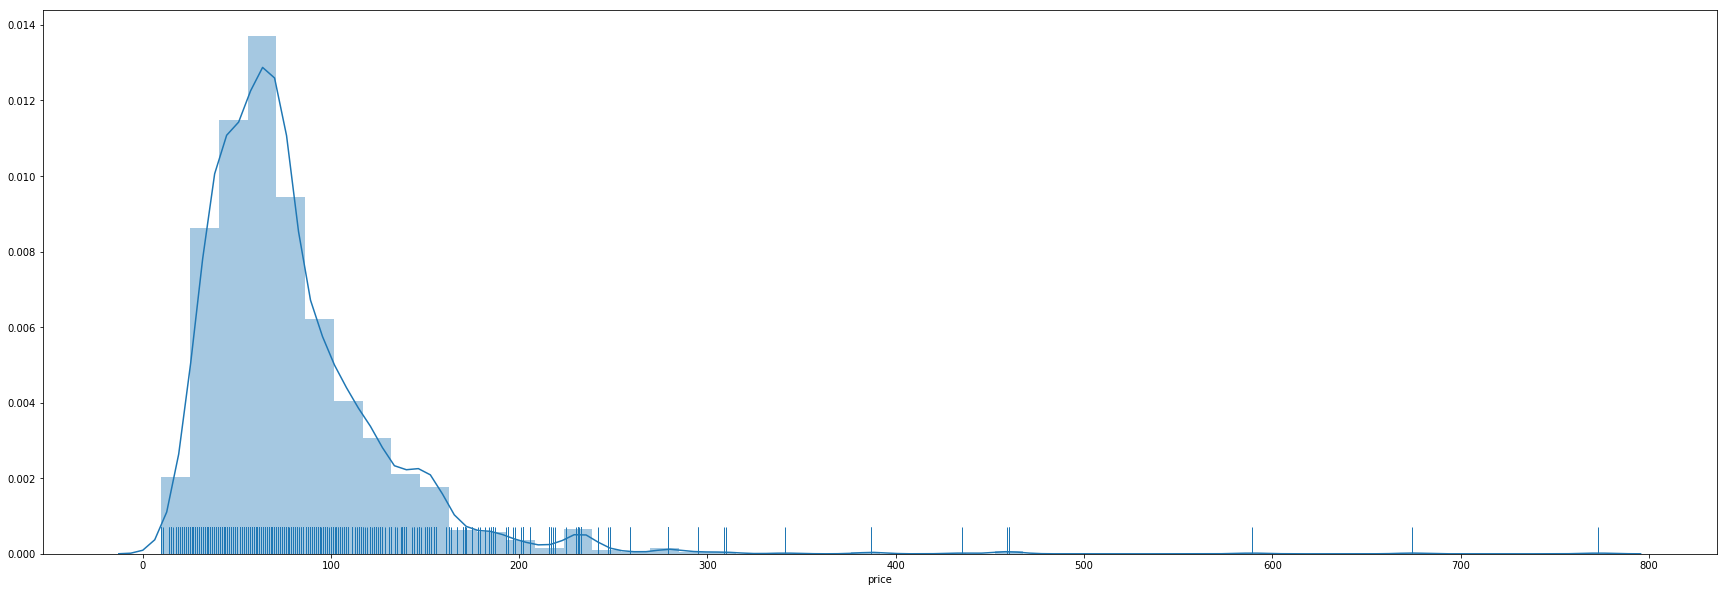

In [35]:
plt.figure(figsize=(30,10))
sb.distplot(frankfurt['price'], rug=True)

In [36]:
frankfurt['room_type'].unique()

array(['Entire home/apt', 'Shared room', 'Private room'], dtype=object)

D:\Installed Software\Anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


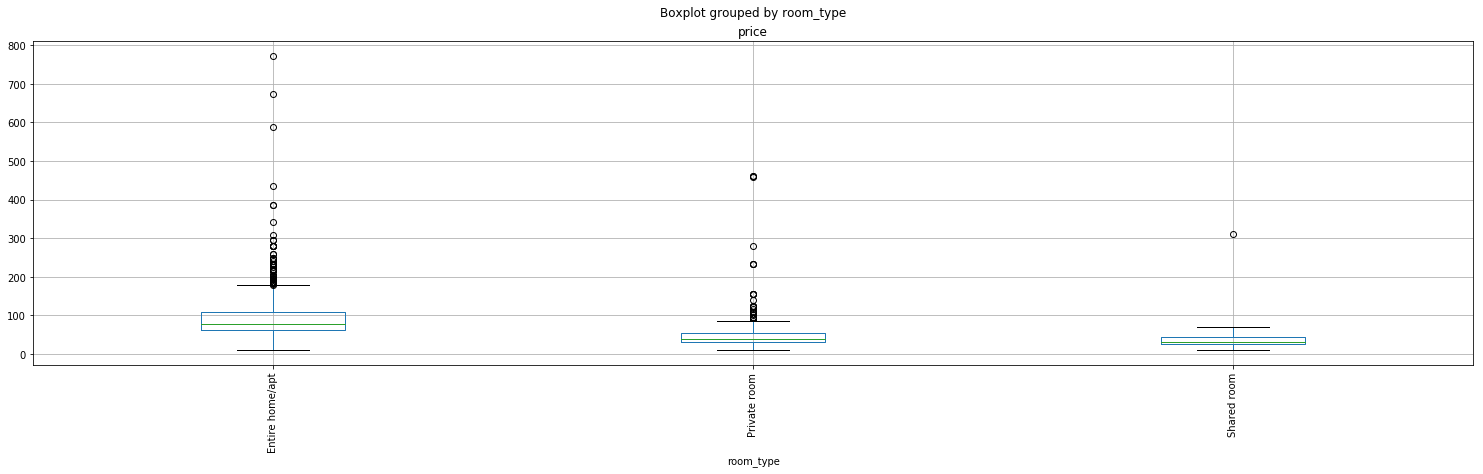

In [37]:
frankfurt.boxplot(column='price', by='room_type', figsize=(25,6), rot=90)

D:\Installed Software\Anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


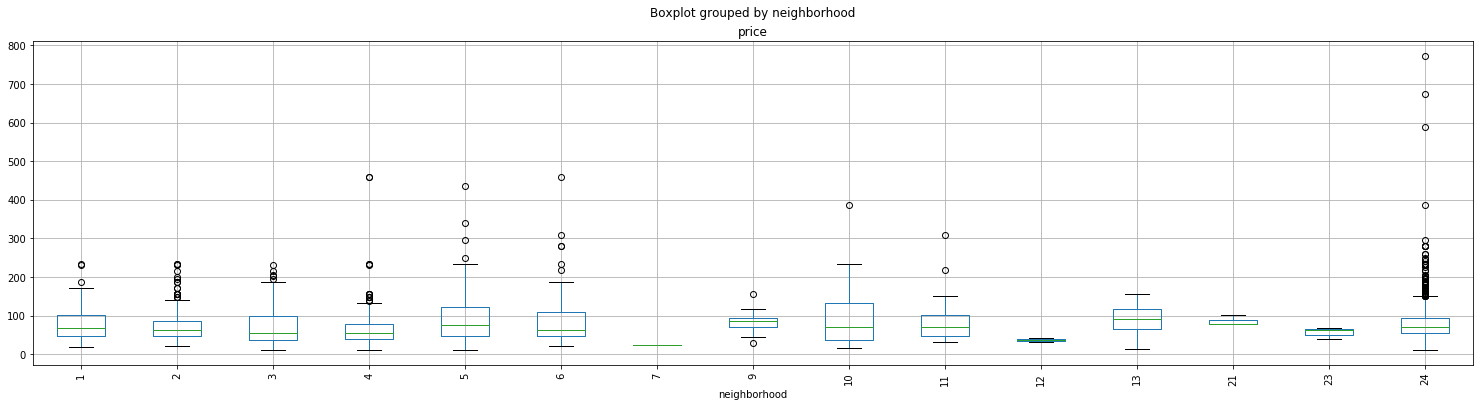

In [38]:
frankfurt.boxplot(column='price', by='neighborhood', figsize=(25,6), rot=90)

# What about longitue and latitude

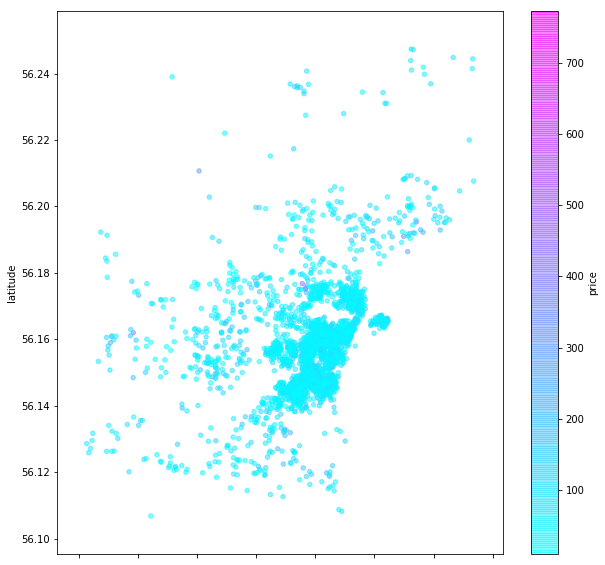

In [39]:
frankfurt.plot.scatter(x='longitude', y='latitude', c='price', figsize=(10,10), cmap='cool', alpha=0.5);

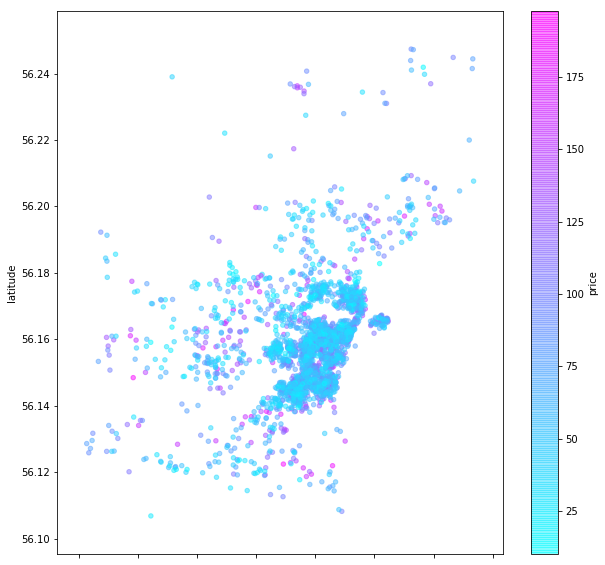

In [40]:
frankfurt[frankfurt['price']<200].plot.scatter(x='longitude', y='latitude', c='price', figsize=(10,10), cmap='cool', alpha=0.5);

# And reviews:

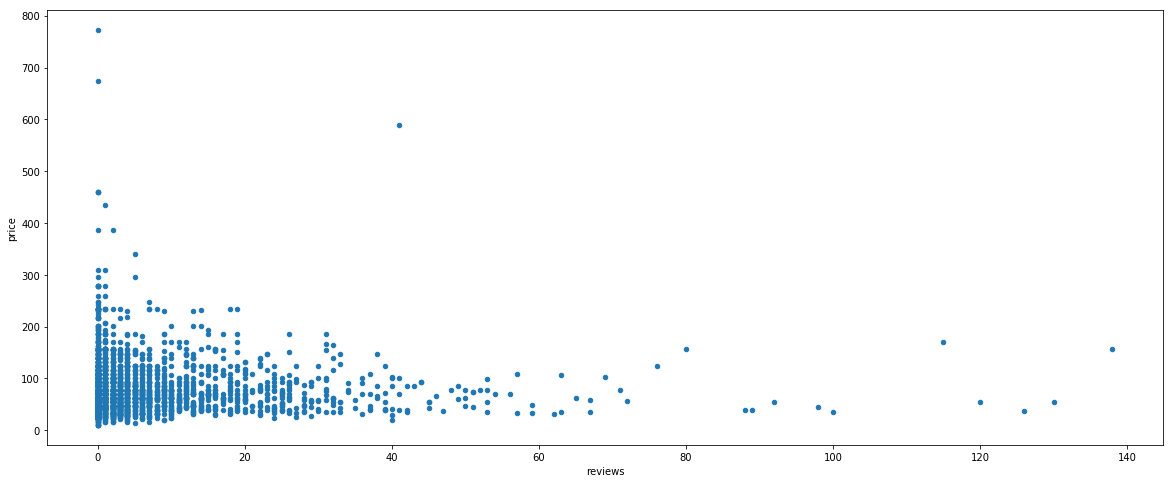

In [41]:
frankfurt.plot.scatter(x='reviews', y='price', figsize=(20,8));

# Feature Engineering

# With review

In [42]:
frankfurt['logreviews'] = np.log(1 + frankfurt['reviews'])
frankfurt['bedrooms_per_accommodates']=frankfurt['bedrooms']/frankfurt['accommodates']

In [43]:
frankfurt.head()

,survey_id,room_type,city,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude,location,logreviews,bedrooms_per_accommodates
0,1353,Entire home/apt,Aarhus,1,4,5.0,6,3.0,167.0,56.121292,10.194918,0101000020E6100000AFCDC64ACC6324401AA20A7F860F...,1.609438,0.500000
1,1353,Entire home/apt,Aarhus,24,4,5.0,3,2.0,156.0,56.139545,10.207896,0101000020E61000003DF03158716A244000A94D9CDC11...,1.609438,0.666667
2,1353,Entire home/apt,Aarhus,6,1,0.0,4,1.0,153.0,56.156649,10.179333,0101000020E6100000E82FF488D15B2440BEF90D130D14...,0.693147,0.250000
3,1353,Entire home/apt,Aarhus,24,1,0.0,4,0.0,156.0,56.144958,10.192338,0101000020E61000005C8E57207A62244094A5D6FB8D12...,0.693147,0.000000
4,1353,Entire home/apt,Aarhus,2,1,0.0,7,4.0,156.0,56.136666,10.170413,0101000020E610000062A06B5F40572440D13C80457E11...,0.693147,0.571429


# without review 

In [44]:
data=frankfurt.copy()
print('amount of fata original: ' + str(len(data)))
#data = data[data['reviews']>10]###
print('amount of data after removing "few reviwes" properties: '+ str(len(data)))

amount of fata original: 2802
amount of data after removing "few reviwes" properties: 2802


In [45]:
data = pd.get_dummies(data)
data.head()

,survey_id,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude,logreviews,...,location_0101000020E6100000FF976BD102642440B056ED9A90144C40,location_0101000020E6100000FFAF3A72A46324402FDD240681134C40,location_0101000020E6100000FFAF3A72A4632440357C0BEBC6114C40,location_0101000020E6100000FFB0A547536524400D1B65FD66144C40,location_0101000020E6100000FFB1101D024F2440F299EC9FA7134C40,location_0101000020E6100000FFCA4A935260244037AAD381AC134C40,location_0101000020E6100000FFD0CC936B522440BA490C022B134C40,location_0101000020E6100000FFE9060ABC6B2440D47D00529B144C40,location_0101000020E6100000FFE9060ABC7324407784D38217154C40,location_0101000020E6100000FFEA71DF6A652440AF0AD462F0144C40
0,1353,1,4,5.0,6,3.0,167.0,56.121292,10.194918,1.609438,...,0,0,0,0,0,0,0,0,0,0
1,1353,24,4,5.0,3,2.0,156.0,56.139545,10.207896,1.609438,...,0,0,0,0,0,0,0,0,0,0
2,1353,6,1,0.0,4,1.0,153.0,56.156649,10.179333,0.693147,...,0,0,0,0,0,0,0,0,0,0
3,1353,24,1,0.0,4,0.0,156.0,56.144958,10.192338,0.693147,...,0,0,0,0,0,0,0,0,0,0
4,1353,2,1,0.0,7,4.0,156.0,56.136666,10.170413,0.693147,...,0,0,0,0,0,0,0,0,0,0


In [46]:
#drop the price because we want to predict it.
X=data.copy().drop('price',axis=1)
#y will be the price.
y=data['price'].copy()

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [48]:
#train the machine
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Baseline


In [49]:
baseline= y_train.median() #mefin train
baseline_error = np.sqrt(mean_squared_error(y_pred=np.ones_like(y_test)*baseline,y_true=y_test))
baseline_error

44.8170635681979

# Machine Learing


In [50]:
lr = LinearRegression()
alphas= [1000, 100, 50, 20, 10, 1, 0.1, 0.01]
li_ratios=[0.001,0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9]
ridge= RidgeCV(alphas=alphas)
lasso=LassoCV(alphas=alphas, max_iter=10000)
li_ratio=li_ratios
elastic=ElasticNetCV(alphas=alphas)

In [51]:
for model, name in zip([lr, ridge, lasso, elastic], ["LinearRegression", "Ridge", "Lasso", "Elasticnet"]):
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    mrse_train = np.sqrt(mean_squared_error(y_pred=y_pred_train, y_true=y_train))
    y_pred=model.predict(X_test_scaled)
    mrse_test = np.sqrt(mean_squared_error(y_pred=y_pred, y_true=y_test))
    best_alpha=''
    if name != "LinearRegression":
        best_alpha = 'best alpha: ' + str(model.alpha_)
    best_li=''
    if name== "ElasticNet":
        best_li = 'best li: ' +str(model.li_ratio_)
    print(name + 'mrse_train:' +str(mrse_train)+ ', mrse_test: '+ str(mrse_test) + best_alpha + best_li)


LinearRegressionmrse_train:2.372076603992182e-13, mrse_test: 35.492582137110276
Ridgemrse_train:0.00021255685194401948, mrse_test: 35.24123145923182best alpha: 0.01
Lassomrse_train:24.274848204891192, mrse_test: 34.220609708348015best alpha: 1.0
Elasticnetmrse_train:0.3956244001644439, mrse_test: 34.60054045611405best alpha: 0.01


In [52]:
print(lasso.coef_)

[ 0.          2.90081403  0.         ...  0.         -0.
  0.        ]


In [53]:
high_error= X_train[np.abs(diff)>80]
print('size high error: '+ str(len(high_error)))
low_error = X_train[np.abs(diff) < 10]
print('size low error: ' + str(len(low_error)))

NameError: name 'diff' is not defined